In [1]:
'''
The goal here is to understand how the D and G models are designed for a GAN and how they are put together and trained.
For this we need to :

    1. Select a One-Dimensional Function
    2. Define a Discriminator Model
    3. Define a Generator Model
    4. Train the Generator Model
    5. Evaluate the Performance of the GAN
    6. Putting it together
'''

'\nThe goal here is to understand how the D and G models are designed for a GAN and how they are put together and trained.\nFor this we need to :\n\n    1. Select a One-Dimensional Function\n    2. Define a Discriminator Model\n    3. Define a Generator Model\n    4. Training the Generator Model\n    5. Evaluating the Performance of the GAN\n    6. Complete Example of Training the GAN\n'

In [2]:
# 1 - A 1D function -- y = (x**2)

def square(x):
    return x ** 2;

[-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
[0.25, 0.16000000000000003, 0.09, 0.04000000000000001, 0.010000000000000002, 0.0, 0.010000000000000002, 0.04000000000000001, 0.09, 0.16000000000000003, 0.25]


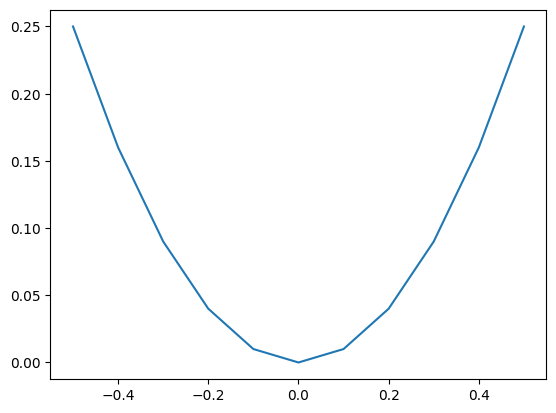

In [3]:
from numpy import arange
import matplotlib.pyplot as plt

inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.5]
print(inputs)

outputs = [square(i) for i in inputs]
print(outputs)

plt.plot(inputs, outputs)
plt.show()

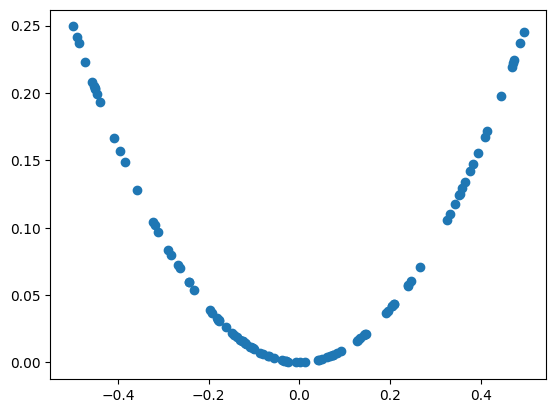

(100, 2)


In [4]:
# the goal of G here is to generate an output that resembles y(x) for inputs x
# for this the D needs to be trained on some samples from the domain

from numpy import hstack
from numpy.random import rand
from numpy import asarray

def random_samples(n = 100):
    X = rand(n) - 0.5
    Y = asarray([square(i) for i in X])

    X = X.reshape(n,1)
    Y = Y.reshape(n,1)

    return hstack((X, Y)) # hstack will join (n,1) (n,1) inputs to (n,2) -- basically joining by columns

samples = random_samples()
plt.scatter(samples[: ,0], samples[: ,1])
plt.show()
print(samples.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


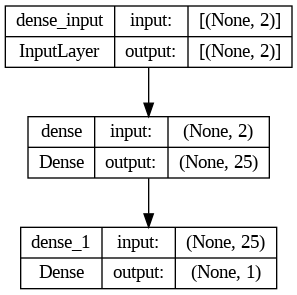

In [5]:
# 2 - The Discriminator Model

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

def make_D(dims_in = 2):
    model = Sequential([
        Dense(25, activation = 'relu', input_dim = dims_in, kernel_initializer='he_uniform'),
        Dense(1, activation = 'sigmoid')
    ])

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

Discriminator = make_D()

Discriminator.summary()
plot_model(Discriminator, show_shapes = True, show_layer_names = True)

In [6]:
# to under the working of the generator,
# lets make a function to make real_samples with label 1 (1 = real)

from numpy import ones
def real_samples(n = 100):
    X = rand(n) - 0.5
    Y = asarray([square(i) for i in X])

    X = X.reshape(n,1)
    Y = Y.reshape(n,1)
    X = hstack((X, Y))

    y = ones((n, 1))
    return X, y

# and another similar one to create fake samples
# for now, this serves the purpose of a generator for generating fake samples
from numpy import zeros
def fake_samples(n = 100):
    X = 2 * rand(n) - 1     # [-1,1]
    Y = 2 * rand(n) - 1     # also [-1,1] , making the mapping y = x (instead of y = x**2)

    X = X.reshape(n,1)
    Y = Y.reshape(n,1)
    X = hstack((X, Y))

    y = zeros((n, 1))
    return X, y

In [8]:
# now we'll define a function to train the discriminator. each batch is half real and half fake samples
# for each epoch we train it on one half batch first, then the other half batch

# note that the functions for real and fake samples generate random values,
# emulating picking of batches from a real dataset where values are distinct but similar

def train_discriminator(model, epochs = 500, batch = 128):
    half_batch = int(batch / 2)

    for i in range(epochs):

        # train on real half-batch
        X_real, y_real = real_samples(half_batch)
        model.train_on_batch(X_real, y_real)

        # train on fake half-batch
        X_fake, y_fake = fake_samples(half_batch)
        model.train_on_batch(X_fake, y_fake)

        #  evaluation
        _, acc_real = model.evaluate(X_real, y_real, verbose = 0)   # returns the loss value and specified metrics
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose = 0)

        if i % 50 == 0:
            print(i, acc_real, acc_fake)

In [10]:
train_discriminator(Discriminator) # run again to continue training

0 1.0 0.875
50 1.0 0.84375
100 1.0 0.875
150 1.0 0.859375
200 1.0 0.875
250 1.0 0.796875
300 1.0 0.90625
350 1.0 0.859375
400 1.0 0.875
450 1.0 0.859375


In [ ]:
# 3 - The Generator Model - soon in sha Allah